In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from scipy.linalg import norm

In [2]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df1=pd.read_csv('sample_data/california_housing_test.csv')

In [3]:
y = df['median_house_value'].values
A=df.drop(['median_house_value'],axis =1).values

In [13]:

A=A[:500]
y=y[:500]

mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
m = y.mean()
y = y-m

In [5]:
class RegPb(object):
    '''                                                                   
        A class for regression problems with linear models.
        
        Attributes:
            A: Data matrix (features)
            y: Data vector (labels)
            n,d: Dimensions of A
            loss: Loss function to be considered in the regression
                'l2': Least-squares loss
                'logit': Logistic loss
            lbda: Regularization parameter
    '''
   
    # Instantiate the class
    def __init__(self, A, y,lbda=0):
        self.A = A
        self.y = y
        self.n, self.p = A.shape
       
        self.lbda = lbda
        
    
    # Objective value
    def f(self, x):
      return np.linalg.norm(self.A.dot(x) - self.y) ** 2 / (2. ) + self.lbda * norm(x) ** 2 / 2.
       
    # Partial objective value
    def f_i(self, i, x):
       
      return np.linalg.norm(self.A[i].dot(x) - self.y[i]) ** 2 / (2.) + self.lbda * norm(x) ** 2 / 2.
 
    
    # Full gradient computation
    def grad(self, x):
        
    
        return self.A.T.dot(self.A.dot(x) - self.y)  + self.lbda * x
       
    
    # Partial gradient
    def grad_i(self,i,x):
        a_i = self.A[i]
        
        
        return (a_i.dot(x) - self.y[i]) * a_i + self.lbda*x
      
    def fl1(self,x):
        return self.f(x)+norm(x,ord=1)

    # maximum learning rate  for the gradient
    def tau(self):
        C = A.transpose().dot(A)
        L = norm(C+self.lbda*np.eye(self.p), ord=2) ** 2  
       
        return 1/L
    # optimal learning rate
    def tau_opt(self):
      C = A.transpose().dot(A)
      tau= 2/( norm(C+self.lbda*np.eye(self.p), ord=2) ** 2+ norm(C+self.lbda*np.eye(self.p), ord=-2) ** 2)
      return tau

In [22]:
def gradientdescent(prob,x0,x_min,iter,tau): ## 
  
  s=x0
  L=[]
  val=0
  for i in range(iter):
    
    
    g=prob.grad(s)
    
    s=s - tau*g
    
    val=prob.f(s)-prob.f(x_min)
    L.append(val)
  return np.array(L),s


In [11]:
lbda1=1
lbda2=10
lbda3=100
n,p=1000,8


In [7]:
prob1=RegPb(A,y,lbda1)
prob2=RegPb(A,y,lbda2)
prob3=RegPb(A,y,lbda3)

In [16]:
C = A.transpose().dot(A)

In [17]:
tau_opt1 = 2 / ( np.linalg.norm(C+lbda1*np.eye(p),2) + np.linalg.norm(C+lbda1*np.eye(p),-2) )
tau_opt2 = 2 / ( np.linalg.norm(C+lbda2*np.eye(p),2) + np.linalg.norm(C+lbda2*np.eye(p),-2) )
tau_opt3= 2 / ( np.linalg.norm(C+lbda3*np.eye(p),2) + np.linalg.norm(C+lbda3*np.eye(p),-2) )
print(tau_opt1,tau_opt2,tau_opt3)

0.0010324911556497186 0.0010229851475944479 0.0009367406848930719


In [18]:
x_min1 = np.linalg.solve( A.transpose().dot(A)+lbda1*np.eye(p), A.transpose().dot(y) )
x_min2 = np.linalg.solve( A.transpose().dot(A)+lbda2*np.eye(p), A.transpose().dot(y) )
x_min3= np.linalg.solve( A.transpose().dot(A)+lbda3*np.eye(p), A.transpose().dot(y) )

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'f()')

Text(0.5, 1.0, 'Comparisons of coefficient of regularization ')

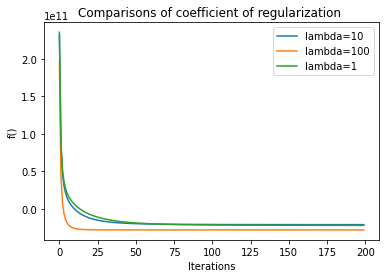

In [36]:
x0=np.zeros(p)



L1=gradientdescent(prob1,x0,x_min1,200,tau_opt1/2)[0]
L2=gradientdescent(prob2,x0,x_min2,200,tau_opt2/2)[0]
L3=gradientdescent(prob3,x0,x_min3,200,tau_opt3/2)[0]
B=[i   for i in range(len(L1))]
B=np.array(B)


plt.plot(B,L2,label='lambda=10')
plt.plot(B,L3,label='lambda=100')
plt.plot(B,L1,label='lambda=1')

plt.xlabel('Iterations')
plt.ylabel('f()')
plt.title('Comparisons of coefficient of regularization ')

plt.legend()
plt.show()

In [61]:
def Ista(prob,x0,x_min,k,tau):

  H=[]
  s=x0
  lbda=prob.lbda
  g=x0
  for i in range(k):

    val=prob.grad(s)

    
    for j in range(p):
      g[j]=s[j]-tau*val[j]
      if g[j]> tau*lbda :
        s[j]=g[j] -tau*lbda
      elif g[j] < - tau*lbda:
        s[j]=g[j] +tau*lbda
      else:
        s[j]=0.
    H.append(prob.f(s))
    


  return H,s


In [ ]:
x0=np.zeros(p)

# Testing l1 regularization
lvals = [23,20,100,0.2,10000,0.001,0.00001]
nlbda = len(lvals)

x0 = np.ones(p)
Xsol = np.zeros((p,nlbda))
H=[i for i in range(100)]
plt.figure(figsize=(7, 5))
for i in range(nlbda):
    lbda =lvals[i]
    t=RegPb(A,y,lbda)
    obj_is, Xsol[:,i] = Ista(t,x0,0,100,tau_opt1/2)
    
    print("Nonzero coefficients with lbda="+str(lbda)+": "+str(np.count_nonzero(Xsol[:,i])))
    plt.plot(H,obj_is, label="lbda="+str(lbda), lw=2)
    
plt.title("Performance of ISTA", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc=1)

plt.figure(figsize=(7, 5))
for i in range(nlbda):
    plt.plot(Xsol[:,i],label="lbda="+str(lvals[i]), lw=2)
plt.title("ISTA solutions", fontsize=16)
plt.xlabel("Component indices", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)
plt.legend(loc=1)

plt.figure(figsize=(7, 5))
for i in range(p):
    plt.plot(lvals,Xsol[i,:],label="x_"+str(i),c=np.random.rand(3,), lw=2)
plt.title("ISTA solutions", fontsize=16)
plt.xlabel("Regularization", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)
plt.legend(ncol=4,loc=1)
